In [10]:
import xarray as xr
import fsspec

In [11]:
store_path = './local_store/argo_new.zarr'
mapper = fsspec.get_mapper(store_path)

In [12]:
ds = xr.open_zarr(mapper)
ds

<xarray.Dataset>
Dimensions:                   (N_PROF: 346, N_LEVELS: 3000)
Dimensions without coordinates: N_PROF, N_LEVELS
Data variables: (12/40)
    CONFIG_MISSION_NUMBER     (N_PROF) float32 dask.array<chunksize=(346,), meta=np.ndarray>
    CYCLE_NUMBER              (N_PROF) float32 dask.array<chunksize=(346,), meta=np.ndarray>
    DATA_CENTRE               (N_PROF) <U2 dask.array<chunksize=(346,), meta=np.ndarray>
    DATA_MODE                 (N_PROF) <U1 dask.array<chunksize=(346,), meta=np.ndarray>
    DATA_STATE_INDICATOR      (N_PROF) <U4 dask.array<chunksize=(346,), meta=np.ndarray>
    DC_REFERENCE              (N_PROF) <U32 dask.array<chunksize=(346,), meta=np.ndarray>
    ...                        ...
    TEMP_ADJUSTED             (N_PROF, N_LEVELS) float32 dask.array<chunksize=(346, 800), meta=np.ndarray>
    TEMP_ADJUSTED_ERROR       (N_PROF, N_LEVELS) float32 dask.array<chunksize=(346, 800), meta=np.ndarray>
    TEMP_ADJUSTED_QC          (N_PROF, N_LEVELS) <U1 dask.array<chunksize=(346, 800), meta=np.ndarray>
    TEMP_QC                   (N_PROF, N_LEVELS) <U1 dask.array<chunksize=(346, 800), meta=np.ndarray>
    VERTICAL_SAMPLING_SCHEME  (N_PROF) <U256 dask.array<chunksize=(346,), meta=np.ndarray>
    WMO_INST_TYPE             (N_PROF) <U4 dask.array<chunksize=(346,), meta=np.ndarray>

In [13]:
ds.TEMP_ADJUSTED.values

array([[22.438, 22.387, 22.307, ...,    nan,    nan,    nan],
       [23.017, 22.966, 22.907, ...,    nan,    nan,    nan],
       [23.524, 23.489, 23.392, ...,    nan,    nan,    nan],
       ...,
       [23.642, 23.608, 23.595, ...,    nan,    nan,    nan],
       [23.511, 23.512, 23.514, ...,    nan,    nan,    nan],
       [23.004, 22.996, 22.966, ...,    nan,    nan,    nan]],
      dtype=float32)

In [25]:
import s3fs
import xarray as xr
s3_store_path = 's3://imos-data-lab-optimised/4428/argo'
s3 = s3fs.S3FileSystem(anon=False)
s3_store = s3fs.S3Map(root=f'{s3_store_path}', s3=s3, check=False)
data = xr.open_zarr(s3_store)
data.TEMP_ADJUSTED.values

array([[29.995, 29.834, 29.611, ...,    nan,    nan,    nan],
       [30.182, 30.18 , 30.156, ...,    nan,    nan,    nan],
       [30.599, 30.583, 30.575, ...,    nan,    nan,    nan],
       ...,
       [26.245, 26.242, 26.244, ...,    nan,    nan,    nan],
       [26.583, 26.583, 26.579, ...,    nan,    nan,    nan],
       [27.203, 27.206, 27.206, ...,    nan,    nan,    nan]],
      dtype=float32)

In [22]:
# Quick Timeseries Profile plot of Temperature
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def np_dt64_to_dt(in_datetime: np.datetime64) -> str:
    """Convert numpy datetime64 to datetime"""
    dt = datetime.fromtimestamp(in_datetime.astype(int) / 1e9)
    return dt.strftime("%Y-%m-%dT%H:%M:%SZ")

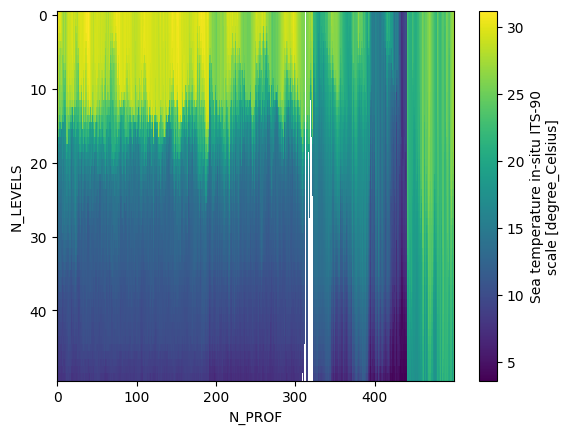

In [26]:
data.isel(N_LEVELS=slice(0,50)).TEMP_ADJUSTED.plot(x='N_PROF')
plt.gca().invert_yaxis()

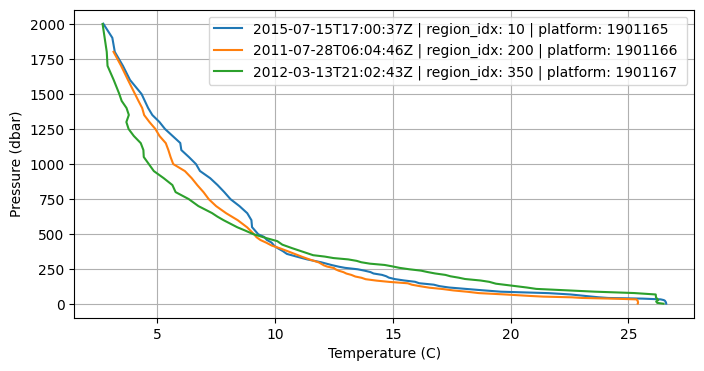

In [66]:
region_idx_1 = 10
region_idx_2 = 200
region_idx_3 = 350

fig, (ax1) = plt.subplots(1, sharey=True, figsize=(8,4))
ax1.plot(data.TEMP_ADJUSTED[region_idx_1], data.PRES_ADJUSTED[region_idx_1], 
             label=f"{np_dt64_to_dt(data.JULD[region_idx_1].values)} | region_idx: {region_idx_1} | platform: {data.PLATFORM_NUMBER[region_idx_1].values}")
ax1.plot(data.TEMP_ADJUSTED[region_idx_2], data.PRES_ADJUSTED[region_idx_2], 
             label=f"{np_dt64_to_dt(data.JULD[region_idx_2].values)} | region_idx: {region_idx_2} | platform: {data.PLATFORM_NUMBER[region_idx_2].values}")
ax1.plot(data.TEMP_ADJUSTED[region_idx_3], data.PRES_ADJUSTED[region_idx_3], 
             label=f"{np_dt64_to_dt(data.JULD[region_idx_3].values)} | region_idx: {region_idx_3} | platform: {data.PLATFORM_NUMBER[region_idx_3].values}")
ax1.set_ylabel('Pressure (dbar)')
ax1.set_xlabel('Temperature (C)')
# ax1.invert_yaxis()
ax1.legend()
# Add some gridlines
ax1.grid()
plt.show()